This document is based off material from Coursera ML course exercises

In [349]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

Cost function for linear regression :
    $ h_0(x) = \theta_0 + \theta_1 x $
    

Need to import data and look at it


In [350]:
import numpy as np
arr = np.loadtxt('ex1data1.txt', delimiter = ',')

## Linear Regression

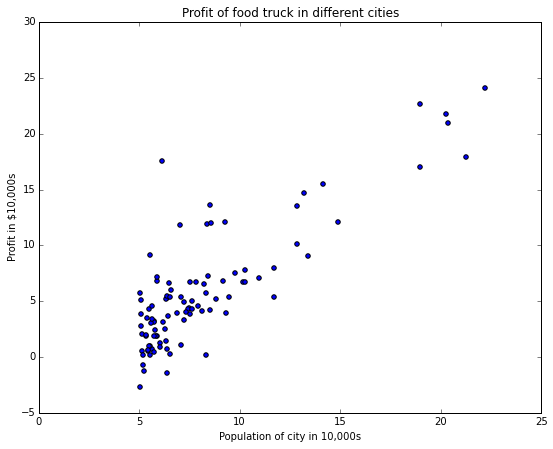

In [351]:
plt.scatter(arr[:,0], arr[:,1], marker = 'o')
plt.title("Profit of food truck in different cities")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")

<function matplotlib.pyplot.show>

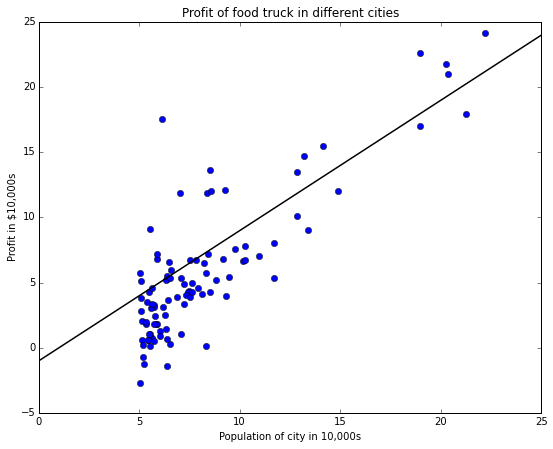

In [352]:
# lets make a basic, arbitrary linear model

plt.plot(arr[:,0], arr[:,1], 'o')

# model starting point
theta0 = -1
theta1 = 1
# model is y = -1 + x
x = 25
model = theta0 + theta1 * x

# for the line
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([0, x], [theta0, model], 'k-', lw = 1.5)

plt.title("Profit of food truck in different cities")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show

In [353]:
# x axis in the plot is using arr[:,0] (predictor variable - city pop), the y axis is arr[:,1] (response - $$)
# so we need a prediction using the model (a vector) for each of the values in arr[:,0]

# our current model is : y = -1 + x (arbitrarily chosen)
theta0 = -1
theta1 = 1
x = arr[:,0]
y = arr[:,1]

# this uses the model to give our predictions
model = theta0 + theta1 * x

# define a function for calculating Root Mean Square Error (To provide a metric for goodness of fit)

def rmse(prd,act):
    meansq = np.mean((prd-act)**2)
    return np.sqrt(meansq)

print(rmse(model, y))

3.35415879006


#### Gradient Descent for linear regression

In [354]:
# how to know when to stop?
# is when theta0 is the same as theta0temp and theta1 is the same as theta1temp
#     i.e., when there is no further updating of model parameters
#     will give this to several decimal places, i.e., when they are the same to 3 d.p.

# should also have a maximum number of iterations, e.g. 100 

# so the iteration will stop when iter = 100 or theta0temp == theta0 && theta1temp == theta1 to 3 d.p.

# these are the model starting points (intercept + predictor coeficient)
theta0 = -1
theta1 = 1

# alpha + data
# alpha is the learning rate - the size of the gradient descent steps
alpha = np.array(0.01, dtype=float)
x = arr[:,0]
y = arr[:,1]
m = np.array(len(x), dtype=float)


iterat = 0
while iterat < 10000:
    theta0temp = theta0 - alpha* (1/m) * np.sum((theta0 + theta1 * x) - y)
    theta1temp = theta1 - alpha*(1/m) * np.sum(((theta0 + theta1 * x) - y) * x)
    if (np.round(theta0temp,5) == np.round(theta0,5)) and (np.round(theta1temp,5) == np.round(theta1,5)):
        break
    theta0 = theta0temp
    theta1 = theta1temp
    iterat = iterat + 1
    
print("New values of theta0 and theta1: %s, %s" % (theta0, theta1))  
print("Number of iterations: %s" % (iterat))

New values of theta0 and theta1: -3.89043503649, 1.19249659639
Number of iterations: 3487


Root mean square error has improved to: 2.99231481556


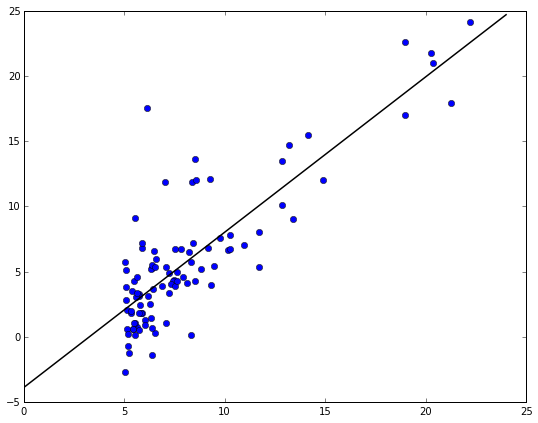

In [355]:
# check how well the regression line fits the points
plt.plot(arr[:,0], arr[:,1], 'o')
y2 = theta0 + theta1*24
plt.plot([0,24],[theta0,y2],'k-', lw = 1.5)

# RMSE of new model

model = theta0 + theta1*x
print("Root mean square error has improved to: %s" % (rmse(model, y)))

In [356]:
# confirm that we have the same answer as existing implementation
regression = np.polyfit(arr[:,0], arr[:,1], 1)
print("Original implementation coefficient values are: %s \
      \nGradient descent implementation values are: %s, %s" % (regression, theta1, theta0))

Original implementation coefficient values are: [ 1.19303364 -3.89578088]       
Gradient descent implementation values are: 1.19249659639, -3.89043503649


### Multiple linear regression

In [357]:
dat2 = np.loadtxt('ex1data2.txt', delimiter = ',')

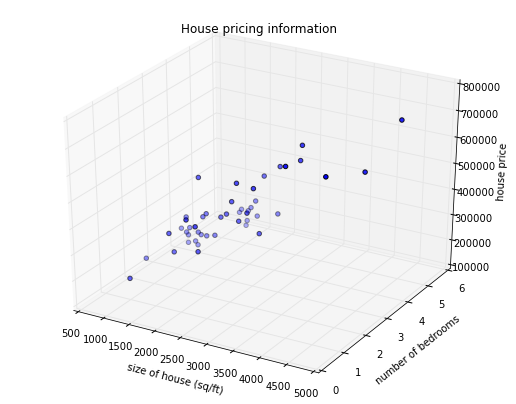

In [358]:
x1 = dat2[:,0] #size of the house in square feet
x2 = dat2[:,1] #number of bedrooms
y = dat2[:,2] #house price

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)

ax.set_title('House pricing information')
ax.set_xlabel('size of house (sq/ft)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('house price')
plt.show()

Scale features


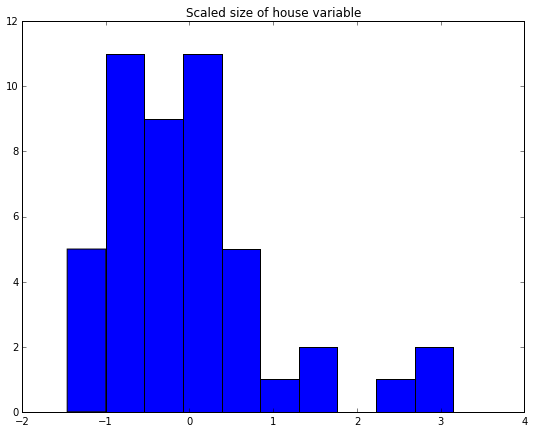

In [359]:
#transform x1; size of house
x1mean = np.mean(x1)
x1sd = np.std(x1)
x1reg = (x1 - x1mean) / x1sd
plt.hist(x1reg)
plt.title("Scaled size of house variable")

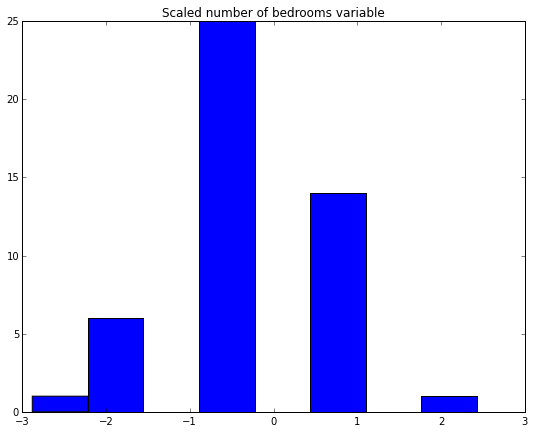

In [360]:
# mean normalise x2 number of bedrooms 
x2mean = np.mean(x2)
x2sd = np.std(x2)
x2reg = (x2 - x2mean) / x2sd
plt.hist(x2reg, bins = 8)
plt.title("Scaled number of bedrooms variable")

In [361]:
# gradient descent

# model form
#h(x) = theta0 + theta1 * x1reg + theta2 * x2reg

#alpha and m (learning rate and number of observations)
alpha = np.array(0.01, dtype=float)
m = np.array(len(x1reg), dtype=float)

# start values
theta0 = 1
theta1 = 1
theta2 = 1

iterat = 0
while iterat < 10000:
    theta0temp = theta0 - alpha* (1/m) * np.sum((theta0 + theta1 * x1reg + theta2 * x2reg) - y)
    theta1temp = theta1 - alpha*(1/m) * np.sum(((theta0 + theta1 * x1reg + theta2 * x2reg) - y) * x1reg)
    theta2temp = theta2 = alpha*(1/m) * np.sum(((theta0 + theta1 * x1reg + theta2 * x2reg) - y) * x2reg) 
    if (np.round(theta0temp,5) == np.round(theta0,5)) and (np.round(theta1temp,5) == np.round(theta1,5)) and (np.round(theta2temp,5) == np.round(theta2,5)):
        break
    theta0 = theta0temp
    theta1 = theta1temp
    theta2 = theta2temp
    iterat = iterat + 1
      
print("Values of theta0, theta1 and theta2: %s, %s, %s " % (theta0, theta1, theta2))  
# to stop such large coefficients should use regularisation
print("Number of iterations: %s" % (iterat))

Values of theta0, theta1 and theta2: 340412.658636, 105738.672431, 45.4683538969 
Number of iterations: 1961


In [362]:
# need to be able to record cost for different thetas, and then plot against iterations
# create new array and append cost at each iteration?

# code for gradient descent

#h(x) = theta0 + theta1 * x1reg + theta2 * x2reg

#alpha and m
alpha = np.array(0.2, dtype=float)
m = np.array(len(x1reg), dtype=float)
xs = np.array([np.ones(len(x1reg)), x1reg, x2reg])

#test values
theta0 = 1
theta1 = 1
theta2 = 1

iterat = 0
cost = []
while iterat < 100000:
    theta0temp = theta0 - alpha* (1/m) * np.sum((theta0 + theta1 * x1reg + theta2 * x2reg) - y)
    theta1temp = theta1 - alpha*(1/m) * np.sum(((theta0 + theta1 * x1reg + theta2 * x2reg) - y) * x1reg)
    theta2temp = theta2 = alpha*(1/m) * np.sum(((theta0 + theta1 * x1reg + theta2 * x2reg) - y) * x2reg) 
    if (np.round(theta0temp,7) == np.round(theta0,7)) and (np.round(theta1temp,7) == np.round(theta1,7)) and (np.round(theta2temp,7) == np.round(theta2,7)):
        break
    theta0 = theta0temp
    theta1 = theta1temp
    theta2 = theta2temp
    # record new cost here;
    thetas = np.array([theta0, theta1, theta2])
    #cost equation
    cst = np.dot((np.dot(thetas, xs)-y).T, np.dot(thetas, xs)-y)
    cost.append(cst)
    iterat += 1
    
print("Values of theta0, theta1 and theta2: %s, %s, %s " % (theta0, theta1, theta2))  
print("Number of iterations: %s" % (iterat))

Values of theta0, theta1 and theta2: 340412.659574, 105177.93563, 1046.84320427 
Number of iterations: 123


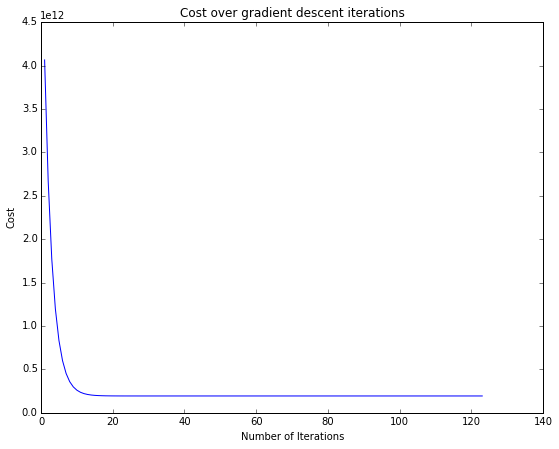

In [363]:
xcost = np.arange(1, len(cost) + 1, 1)
plt.plot(xcost, cost)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost over gradient descent iterations")

The cost decreases fast and doesn't improve much after 20 iterations

In [364]:
# predicted price for a house with 4 bedrooms and 1000 sqft
theta0 + (theta1 * ((3000 - x1mean)/x1sd)) + (theta2 * ((5 - x2mean)/x2sd))

476645.6129376298